In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow


# Importation des bibliothèques
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


VISUALISATION DES HISTOGRAMMES

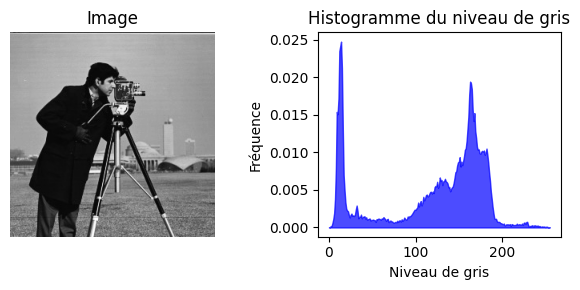

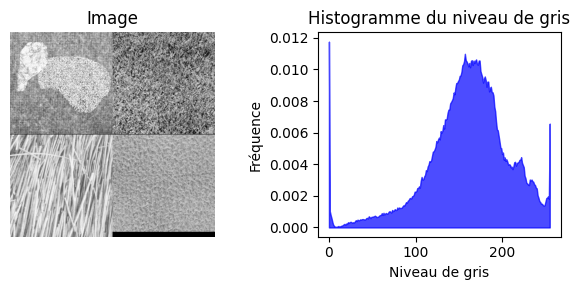

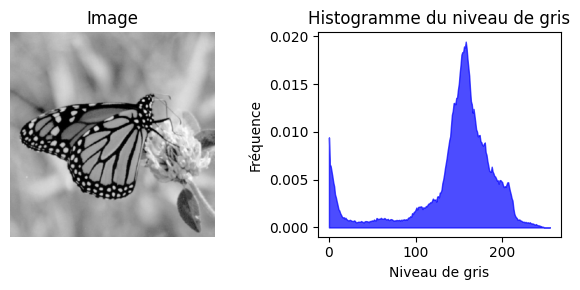

In [ ]:
# Affichage de l'histogramme plein
def plot_full_histogram(hist):
    plt.fill_between(np.arange(len(hist)), hist.flatten(), color='blue', alpha=0.7)
    plt.title('Histogramme du niveau de gris')
    plt.xlabel('Niveau de gris')
    plt.ylabel('Fréquence')

# Affichage d'une image avec son histogramme
def plot_image_with_histogram(image, hist):
    plt.figure(figsize=(6, 3))

    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plot_full_histogram(hist)

    plt.tight_layout()
    plt.show()

# Chemin du dossier contenant les images
images_path = "/content/drive/MyDrive/Traitement_image_1"

# Tableau pour stocker les chemins des images
chemins_images = []

# Parcours du dossier d'images et ajout des chemins à la liste
for fichier in os.listdir(images_path):
    path_image = os.path.join(images_path, fichier)
    # Vérification de l'existence du fichier
    if os.path.isfile(path_image):
        chemins_images.append(path_image)

# Parcours des images et affichage de leurs histogrammes
for chemin_image in chemins_images:
    # Lecture de l'image en niveaux de gris
    image = cv2.imread(chemin_image, cv2.IMREAD_GRAYSCALE)

    # Calcul de l'histogramme
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Normalisation de l'histogramme
    hist = hist / hist.sum()

    # Affichage de l'image avec son histogramme
    plot_image_with_histogram(image, hist)


AUGMENTATION DU CONTRASTE AVEC LA METHODE D'EGALISATION DE L'HISTOGRAMME

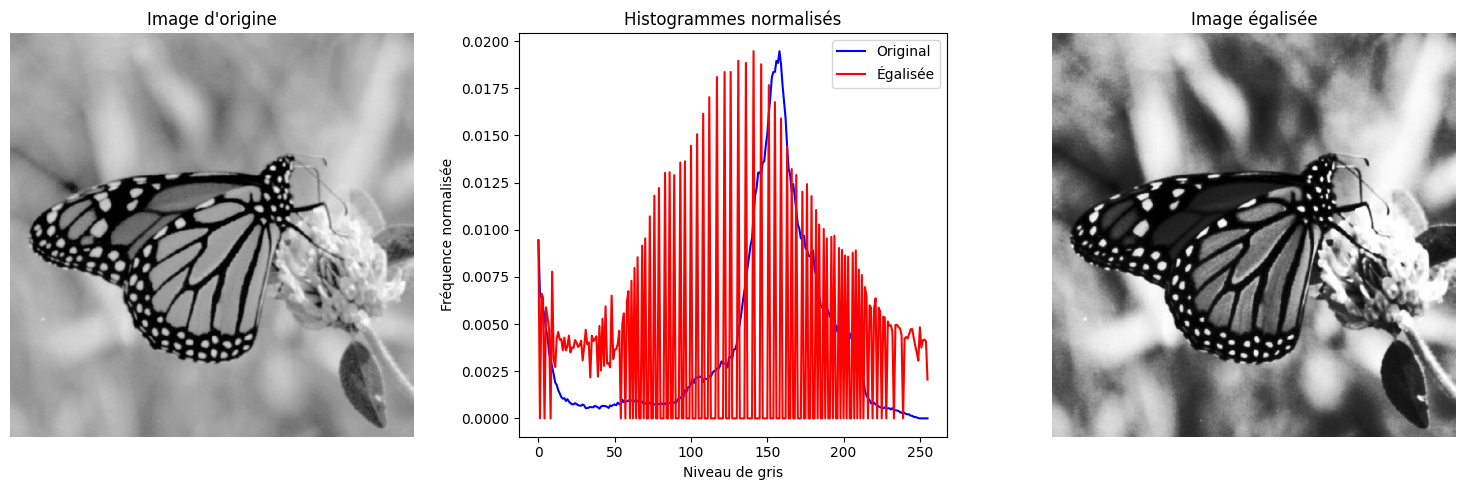

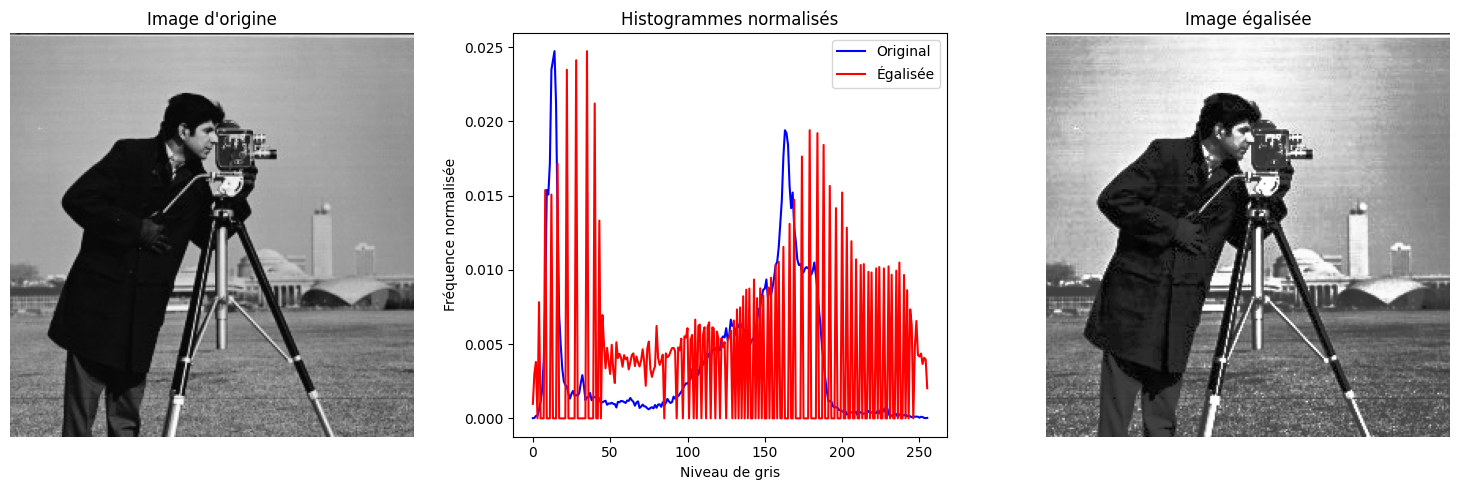

In [ ]:
# Affichage de l'effet de l'égalisation de l'histogramme
def plot_histogram_equalization_effect(image):
    # Application de l'égalisation de l'histogramme
    equ_image = cv2.equalizeHist(image)

    # Calcul des histogrammes normalisés
    hist_original, _ = np.histogram(image.ravel(), bins=256, range=[0, 256], density=True)
    hist_equ, _ = np.histogram(equ_image.ravel(), bins=256, range=[0, 256], density=True)

    # Affichage des images d'origine, égalisée et leurs histogrammes normalisés
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Image d\'origine')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.plot(hist_original, color='blue', label='Original')
    plt.plot(hist_equ, color='red', label='Égalisée')
    plt.title('Histogrammes normalisés')
    plt.xlabel('Niveau de gris')
    plt.ylabel('Fréquence normalisée')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.imshow(equ_image, cmap='gray')
    plt.title('Image égalisée')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Chemin du dossier contenant les images
images_path = "/content/drive/MyDrive/Traitement_image"

# Tableau pour stocker les chemins des images
chemins_images = []

# Parcours du dossier d'images et ajout des chemins à la liste
for fichier in os.listdir(images_path):
    path_image = os.path.join(images_path, fichier)
    # Vérification de l'existence du fichier
    if os.path.isfile(path_image):
        chemins_images.append(path_image)

# Parcours des images et affichage de leurs histogrammes
for chemin_image in chemins_images:
    # Lecture de l'image en niveaux de gris
    image = cv2.imread(chemin_image, cv2.IMREAD_GRAYSCALE)

    # Appel de la fonction pour afficher l'effet de l'égalisation de l'histogramme
    plot_histogram_equalization_effect(image)


TRANSFORMATION LINEAIRE

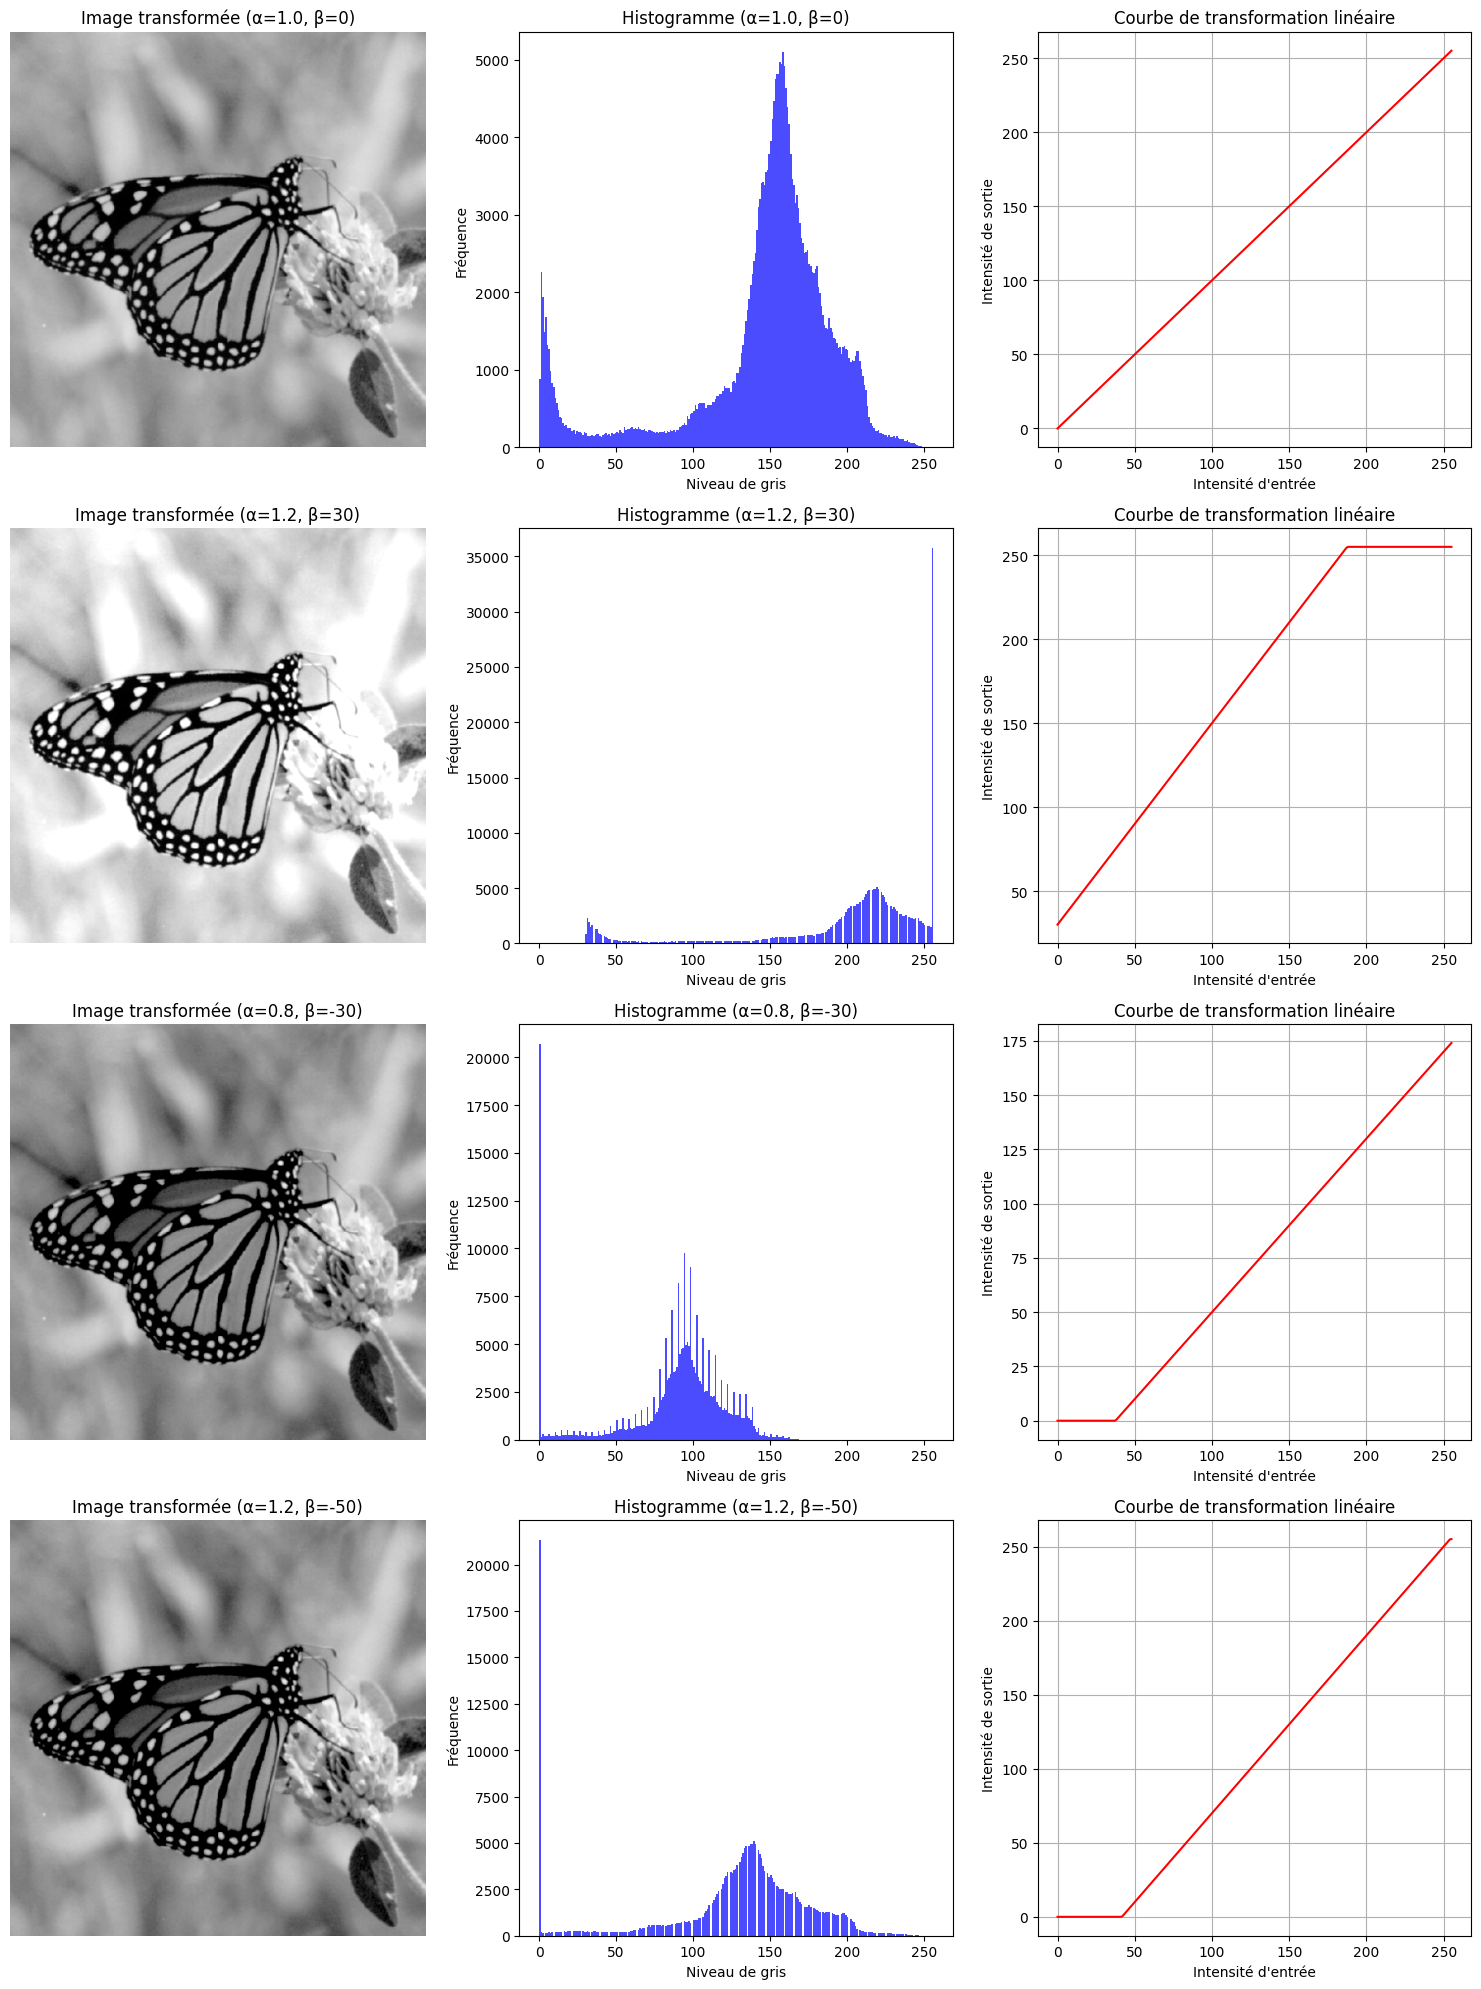

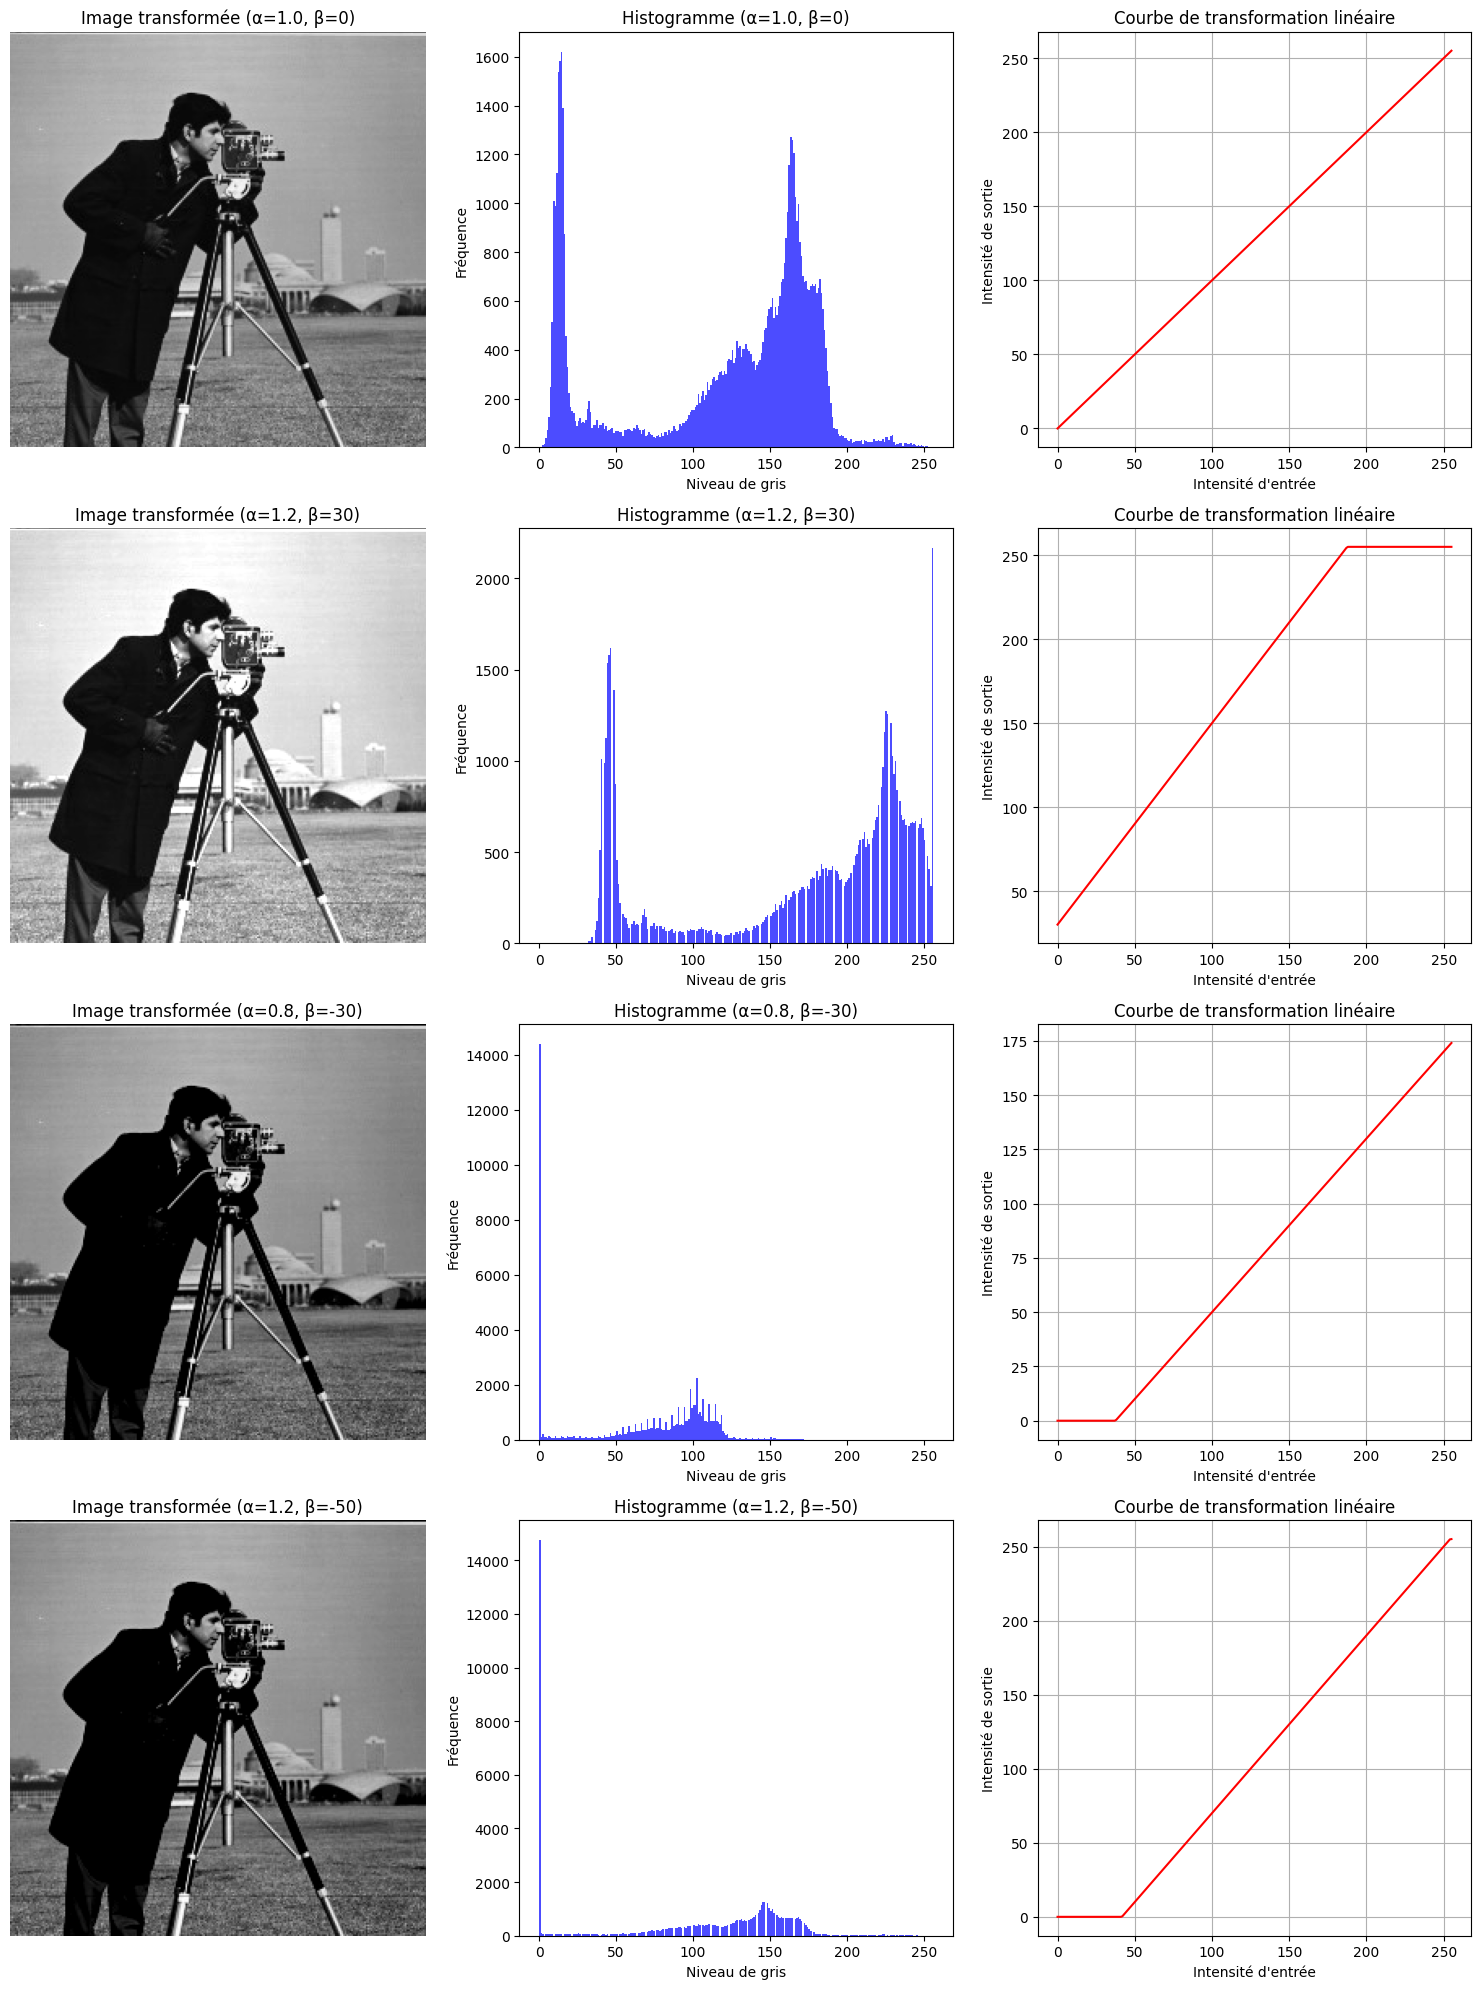

In [ ]:
# Spécifiez le chemin du dossier contenant les images
folder_path = '/content/drive/MyDrive/Traitement_image'

# Fonction pour la transformation linéaire
def linear_transformation(image, alpha, beta):
    new_image = image.astype(np.float32)
    new_image = alpha * new_image + beta
    new_image = np.clip(new_image, 0, 255)
    return new_image.astype(np.uint8)

# Paramètres de transformation linéaire
alpha_beta_pairs = [(1.0, 0), (1.2, 30), (0.8, -30), (1.2, -50)]  # Liste des couples (alpha, beta)

# Spécifiez le chemin du dossier contenant les images
folder_path = '/content/drive/MyDrive/Traitement_image'

# Lister tous les fichiers dans le dossier
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Fonction pour afficher les histogrammes
def plot_histogram(image, title, ax):
    ax.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Niveau de gris')
    ax.set_ylabel('Fréquence')

# Traiter chaque image dans le dossier
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur lors de la lecture de l'image : {image_file}")
        continue

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Afficher les résultats pour chaque couple (alpha, beta)
    fig, axs = plt.subplots(len(alpha_beta_pairs), 3, figsize=(15, 5 * len(alpha_beta_pairs)))

    for idx, (alpha, beta) in enumerate(alpha_beta_pairs):
        # Appliquer la transformation linéaire
        transformed_image = linear_transformation(gray_image, alpha, beta)

        # Créer la courbe de transformation linéaire
        x = np.arange(256)
        y = np.clip(alpha * x + beta, 0, 255)

        # Image transformée et son histogramme
        axs[idx, 0].imshow(transformed_image, cmap='gray')
        axs[idx, 0].set_title(f"Image transformée (α={alpha}, β={beta})")
        axs[idx, 0].axis('off')
        plot_histogram(transformed_image, f'Histogramme (α={alpha}, β={beta})', axs[idx, 1])

        # Courbe de transformation linéaire
        axs[idx, 2].plot(x, y, 'r')
        axs[idx, 2].set_title('Courbe de transformation linéaire')
        axs[idx, 2].set_xlabel('Intensité d\'entrée')
        axs[idx, 2].set_ylabel('Intensité de sortie')
        axs[idx, 2].grid(True)

    plt.tight_layout()
    plt.show()

CORRECTION GAMMA AVEC DES PARAMETRES DIFFERENTS

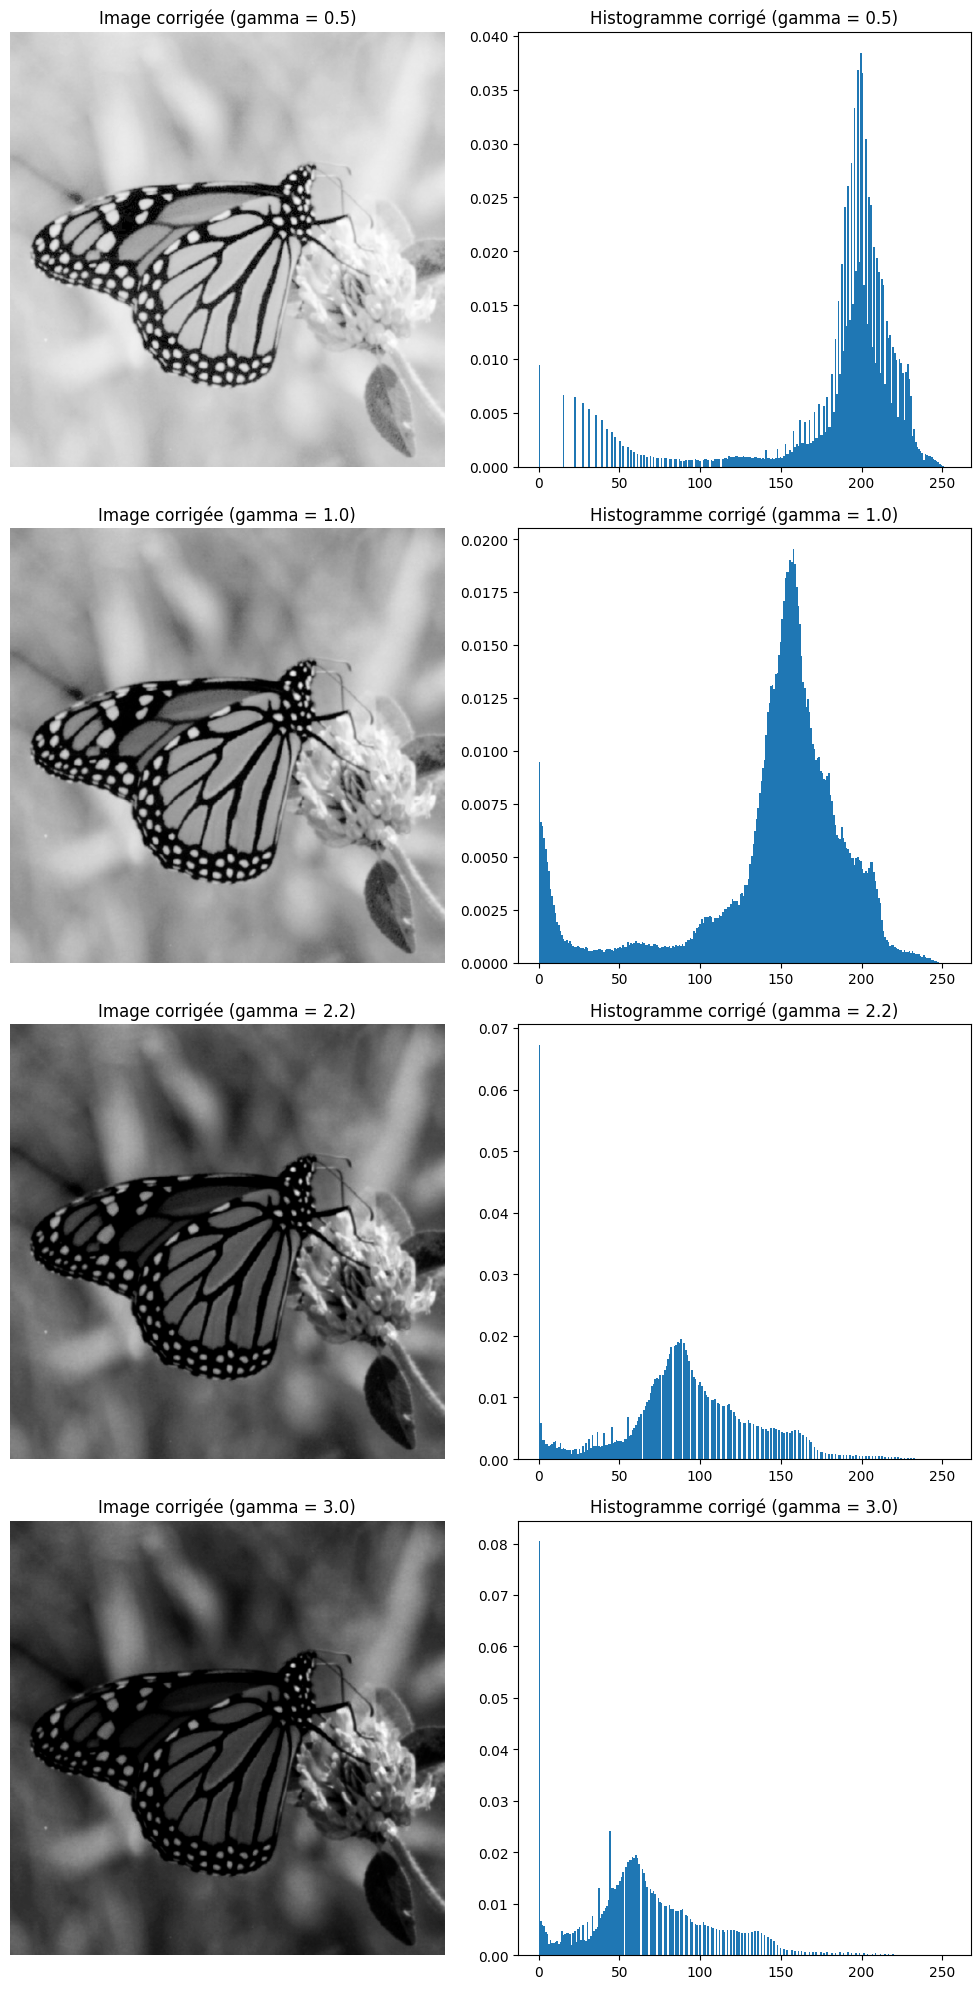

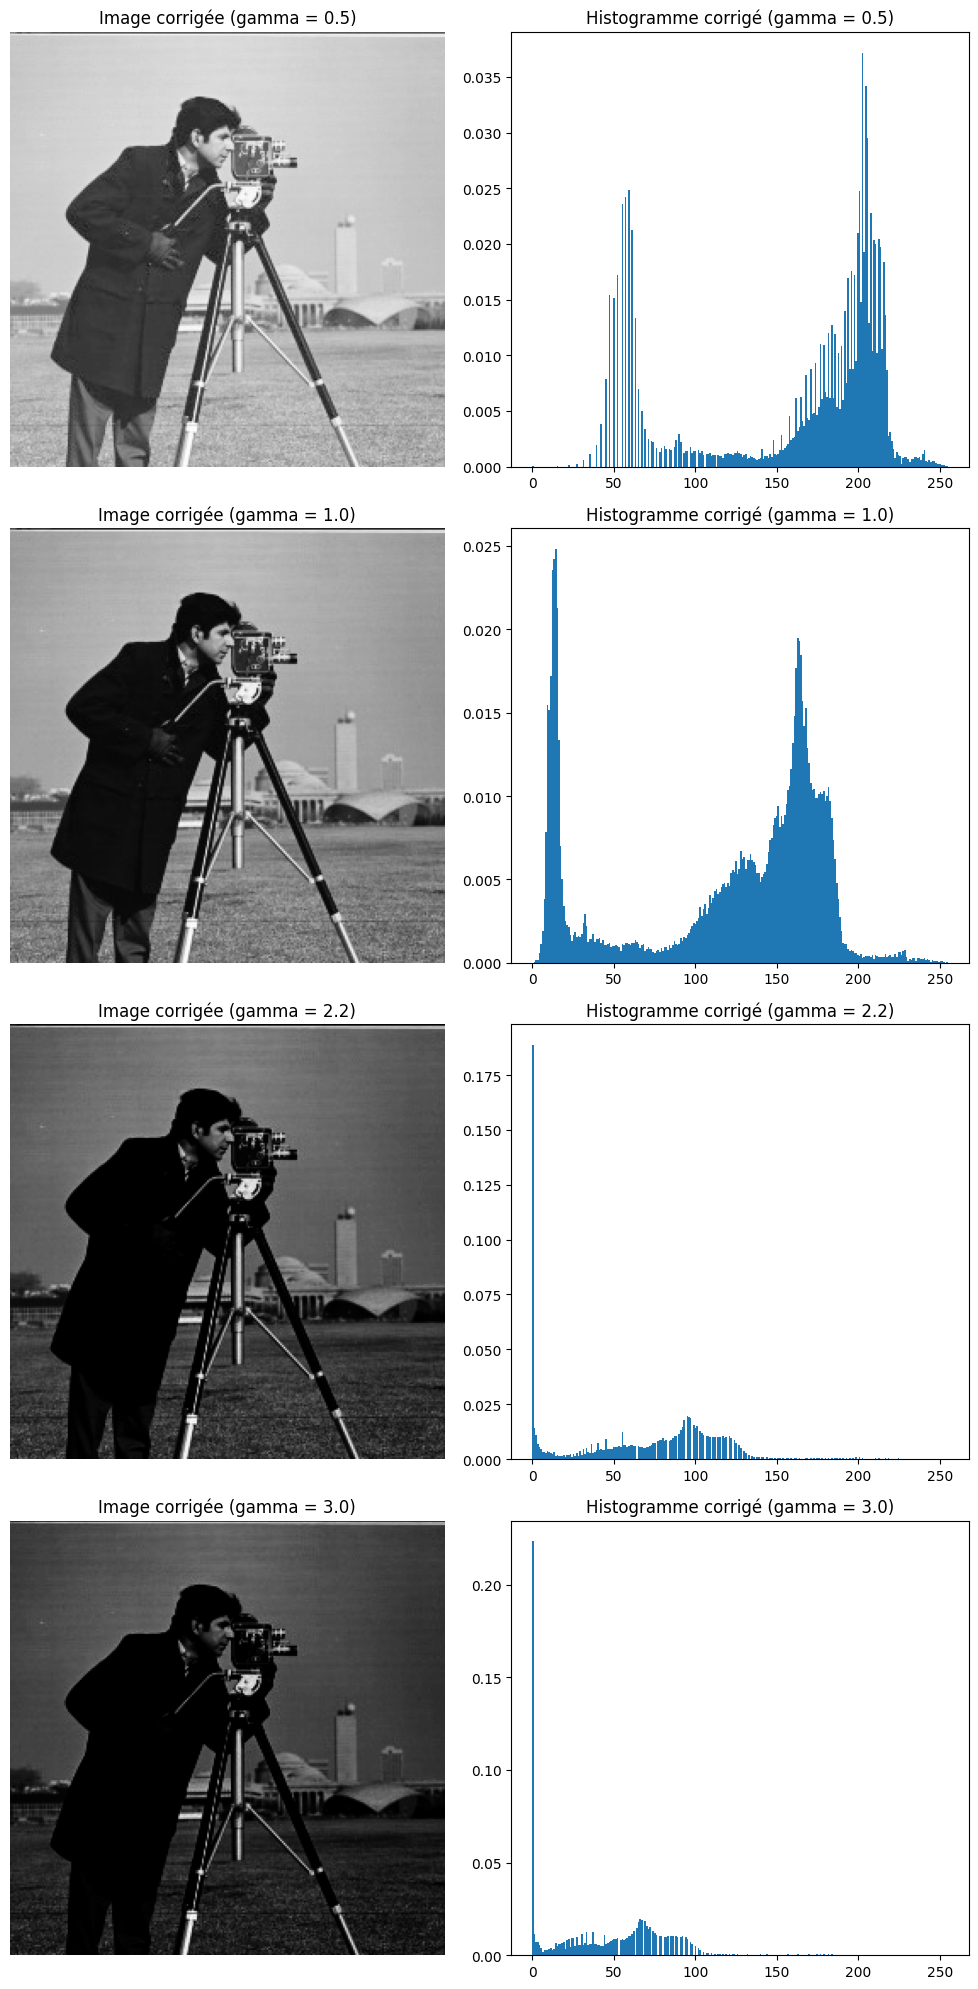

In [ ]:
# Spécifiez le chemin du dossier contenant les images
folder_path = '/content/drive/MyDrive/Traitement_image'

# Fonction de correction gamma
def gamma_correction(image, gamma):
    # Normaliser l'image
    normalized_image = image / 255.0
    # Appliquer la correction gamma
    corrected_image = np.power(normalized_image, gamma)
    # Revenir à la plage [0, 255]
    corrected_image = corrected_image * 255
    return corrected_image.astype(np.uint8)

# Fonction pour charger une image en niveaux de gris
def load_gray_image(file_path):
    return cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# Fonction pour tracer l'histogramme
def plot_histogram(image, title, ax):
    ax.hist(image.ravel(), bins=256, range=(0, 255), density=True)
    ax.set_title(title)

# Valeurs de gamma à tester
gamma_values = [0.5, 1.0, 2.2, 3.0]

# Charger et traiter chaque image dans le dossier
for file_name in os.listdir(folder_path):
    if file_name.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        file_path = os.path.join(folder_path, file_name)

        # Charger l'image
        gray_image = load_gray_image(file_path)

        fig, axs = plt.subplots(len(gamma_values), 2, figsize=(10, 5 * len(gamma_values)))

        for i, gamma in enumerate(gamma_values):
            # Appliquer la correction gamma
            gamma_corrected_image = gamma_correction(gray_image, gamma)

            # Image après correction gamma
            axs[i, 0].imshow(gamma_corrected_image, cmap='gray')
            axs[i, 0].set_title(f"Image corrigée (gamma = {gamma})")
            axs[i, 0].axis('off')
            plot_histogram(gamma_corrected_image, f"Histogramme corrigé (gamma = {gamma})", axs[i, 1])

        plt.tight_layout()
        plt.show()